# Bài tập Khoa học dữ liệu

Tên: Võ Văn Thành

MSV: 102190190

[Dataset](https://www.kaggle.com/datasets/chuckephron/leagueoflegends)


# Chung

Import thư viện

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from ast import literal_eval
from pandas import DataFrame
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


warnings.filterwarnings('ignore')

plt.rcParams['figure.facecolor'] = 'white'


Load dataset

In [2]:
df = pd.read_csv("LeagueofLegends.csv")
df.head()


,League,Year,blueTeamTag,bResult,rResult,redTeamTag,gamelength,goldblue,bKills,bTowers,...,bDragons,bBarons,bHeralds,goldred,rKills,rTowers,rInhibs,rDragons,rBarons,rHeralds
0,NALCS,2017,TSM,0,1,C9,41,"[2500, 2500, 2754, 4375, 5710, 7232, 8572, 999...","[[12.634, 'C9 Smoothie', 'TSM Biofrost', ['TSM...","[[23.907, 'MID_LANE', 'OUTER_TURRET'], [24.667...",...,"[[31.477, 'FIRE_DRAGON'], [18.906, 'AIR_DRAGON...",[[21.947]],[],"[2500, 2500, 2734, 4166, 5741, 7195, 8610, 101...","[[11.827, 'TSM WildTurtle', 'C9 Contractz', ['...","[[34.173, 'BOT_LANE', 'BASE_TURRET'], [40.237,...","[[39.531, 'BOT_LANE']]","[[38.477, 'ELDER_DRAGON'], [12.416, 'AIR_DRAGO...",[[36.328]],[]
1,NALCS,2017,C9,1,0,TSM,37,"[2500, 2500, 2651, 4090, 5708, 7121, 8678, 106...","[[6.818, 'TSM Bjergsen', 'C9 Contractz', ['C9 ...","[[21.425, 'MID_LANE', 'INNER_TURRET'], [31.576...",...,"[[25.086, 'EARTH_DRAGON'], [18.828, 'AIR_DRAGO...",[],[[17.209]],"[2500, 2500, 2736, 4277, 5846, 7136, 8725, 100...","[[13.099, 'C9 Smoothie', 'TSM Svenskeren', ['T...","[[19.222, 'TOP_LANE', 'OUTER_TURRET'], [24.044...",[],[],[[28.447]],[]
2,NALCS,2017,FOX,0,1,P1,39,"[2500, 2500, 2752, 4181, 6258, 7750, 9199, 112...","[[3.049, 'P1 Ryu', 'FOX Akaadian', ['FOX Frogg...","[[17.12, 'TOP_LANE', 'OUTER_TURRET'], [32.589,...",...,"[[32.18, 'FIRE_DRAGON']]",[[30.011]],[],"[2500, 2500, 2678, 4048, 5421, 6750, 8195, 967...","[[6.011, 'FOX Akaadian', 'P1 Ryu', ['P1 Inori'...","[[36.103, 'MID_LANE', 'BASE_TURRET'], [37.984,...","[[36.19, 'MID_LANE']]","[[25.937, 'AIR_DRAGON'], [15.185, 'FIRE_DRAGON']]",[],[]
3,NALCS,2017,P1,1,0,FOX,25,"[2500, 2500, 2752, 4075, 5543, 7052, 8179, 967...","[[10.351, 'FOX Looper', 'P1 zig', ['P1 Inori',...","[[13.671, 'BOT_LANE', 'OUTER_TURRET'], [23.386...",...,"[[14.287, 'AIR_DRAGON']]",[[21.758]],[],"[2500, 2520, 2775, 4153, 5727, 7282, 9208, 105...","[[5.296, 'P1 Inori', 'FOX Akaadian', ['FOX Loo...","[[13.925, 'TOP_LANE', 'OUTER_TURRET'], [17.556...",[],"[[20.939, 'FIRE_DRAGON']]",[],[]
4,NALCS,2017,CLG,0,1,TL,35,"[2500, 2500, 2740, 4101, 5506, 6946, 8235, 948...","[[8.541, 'TL Piglet', 'CLG aphromoo', ['CLG St...","[[23.801, 'MID_LANE', 'OUTER_TURRET'], [24.919...",...,"[[15.874, 'EARTH_DRAGON']]",[[34.232]],[],"[2500, 2500, 2789, 4322, 5868, 7295, 8724, 101...","[[8.52, 'CLG Stixxay', 'TL Matt', ['TL Reignov...","[[16.291, 'BOT_LANE', 'OUTER_TURRET'], [29.924...","[[28.315, 'BOT_LANE'], [34.3, 'BOT_LANE']]","[[9.273, 'FIRE_DRAGON'], [28.655, 'FIRE_DRAGON...",[[26.156]],[]


Các cột trong dataset


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   League       1671 non-null   object
 1   Year         1671 non-null   int64 
 2   blueTeamTag  1671 non-null   object
 3   bResult      1671 non-null   int64 
 4   rResult      1671 non-null   int64 
 5   redTeamTag   1671 non-null   object
 6   gamelength   1671 non-null   int64 
 7   goldblue     1671 non-null   object
 8   bKills       1671 non-null   object
 9   bTowers      1671 non-null   object
 10  bInhibs      1671 non-null   object
 11  bDragons     1671 non-null   object
 12  bBarons      1671 non-null   object
 13  bHeralds     1671 non-null   object
 14  goldred      1671 non-null   object
 15  rKills       1671 non-null   object
 16  rTowers      1671 non-null   object
 17  rInhibs      1671 non-null   object
 18  rDragons     1671 non-null   object
 19  rBarons      1671 non-null 

Kiểm tra dữ liệu rỗng

In [4]:
df.isnull().sum()


League         0
Year           0
blueTeamTag    0
bResult        0
rResult        0
redTeamTag     0
gamelength     0
goldblue       0
bKills         0
bTowers        0
bInhibs        0
bDragons       0
bBarons        0
bHeralds       0
goldred        0
rKills         0
rTowers        0
rInhibs        0
rDragons       0
rBarons        0
rHeralds       0
dtype: int64

Chuyển dữ liệu từ các cột goldblue bKills, bTowers, bInhibs, bDragons, bBarons, bHeralds, goldred, rKills, rTowers, rInhibs, rDragons, rBarons, rHeralds từ string thành kiểu list

In [5]:
type(df['goldblue'][0])


str

In [6]:
column_name = ['goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds',
               'goldred', 'rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds']
for column in column_name:
    df[column] = df[column].apply(literal_eval)

In [7]:
type(df['goldblue'][0])

list

# EDA

Đếm số lượng mục tiêu từ list mục tiêu có được ở các trường vừa chuyển đổi

In [8]:
data = pd.DataFrame()

def count_data(column: pd.Series):
    column = column.to_list()
    result = []
    for item in column:
        result.append(len(item))
    return result

data = data.assign(
                    blue_kills=lambda x: count_data(df['bKills']),
                    blue_towers=lambda x: count_data(df['bTowers']),
                    blue_inhibs=lambda x: count_data(df['bInhibs']),
                    blue_dragons=lambda x: count_data(df['bDragons']),
                    blue_barons=lambda x: count_data(df['bBarons']),
                    blue_heralds=lambda x: count_data(df['bHeralds']),
                    blue_end_gold=lambda x: df['goldblue'].apply(lambda x: x[-1]),
                    red_kills=lambda x: count_data(df['rKills']),
                    red_towers=lambda x: count_data(df['rTowers']),
                    red_inhibs=lambda x: count_data(df['rInhibs']),
                    red_dragons=lambda x: count_data(df['rDragons']),
                    red_barons=lambda x: count_data(df['rBarons']),
                    red_heralds=lambda x: count_data(df['rHeralds']),
                    red_end_gold=lambda x: df['goldred'].apply(lambda x: x[-1]),
                    result=df['rResult'])
data


,blue_kills,blue_towers,blue_inhibs,blue_dragons,blue_barons,blue_heralds,blue_end_gold,red_kills,red_towers,red_inhibs,red_dragons,red_barons,red_heralds,red_end_gold,result
0,12,5,0,3,1,0,68888,20,11,1,2,1,0,81542,1
1,24,8,2,4,0,1,68306,10,2,0,0,1,0,62122,0
2,16,4,0,1,1,0,66224,22,7,1,2,0,0,68027,1
3,13,7,1,1,1,0,43411,8,2,0,1,0,0,38352,0
4,11,3,0,1,1,0,56146,18,8,2,3,1,0,63671,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,3,1,0,0,0,0,53564,19,9,1,2,1,0,66199,1
1667,11,8,1,1,1,0,72633,6,2,0,2,1,0,69978,0
1668,4,2,0,0,0,0,50208,19,7,1,3,2,0,65314,1
1669,11,9,1,1,2,0,76663,8,5,0,3,0,0,71760,0


Biểu đồ nhiệt thể hiện sự tương quan giữa các biến

<AxesSubplot:>

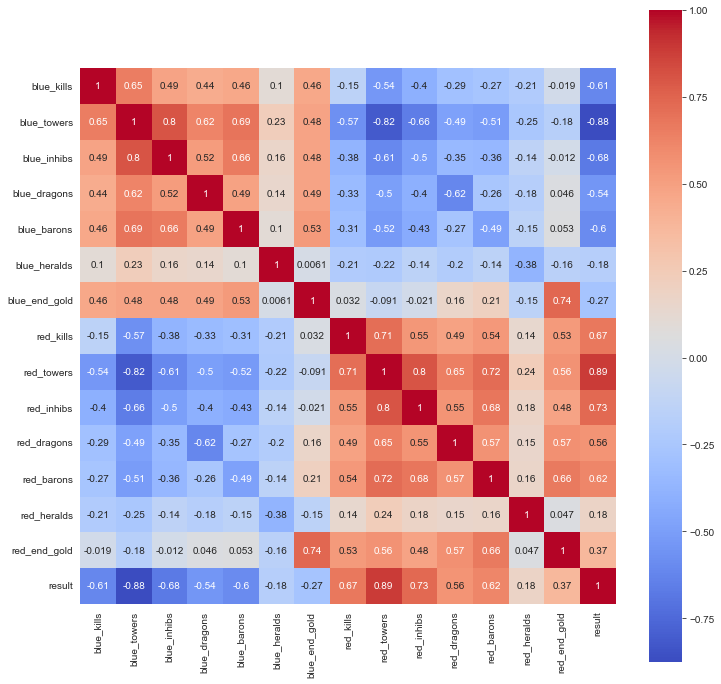

In [9]:
fig = plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
sns.heatmap(data.corr(), annot=True, square=True, cmap='coolwarm')


Qua biểu đồ ta thấy, các chỉ số như điểm hạ gục (kills), trụ (towers), nhà lính (inhibs), rồng (dragon), baron và tổng số vàng kiếm được có mối quan hệ tương quan sâu sắc đến kết quả trận đấu.

Căn cứ vào phân tích trên, em muốn thử nghiệm dựa vào các chỉ số đó trong 30 phút đầu tiên của trận đấu để dự đoán đội nào sẽ giành chiến thắng chung cuộc trong cả trận đấu. (Áp dụng cho những trận đấu kéo dài hơn 30 phút)

# Dự đoán đội chiến thắng bằng các tham số trước phút 30

Đếm các chỉ số trong 30 phút đầu tiên

In [10]:
df_copy = df.copy()
data_limited = pd.DataFrame()

time_limited = 30
df_copy = df_copy[df_copy.gamelength > time_limited]
print(len(df_copy))

def count_data_limited(column: pd.Series, length: float):
    column = column.to_list()
    result = []
    for i, item in enumerate(column):
        result.append([])
        for obj in item:
            if obj[0] < length:
                result[i].append(obj)
    result = [len(item) for item in result]
    return result

data_limited = df_copy.assign(
                    blue_kills=lambda x: count_data_limited(df_copy['bKills'], time_limited),
                    blue_towers=lambda x: count_data_limited(df_copy['bTowers'], time_limited),
                    blue_inhibs=lambda x: count_data_limited(df_copy['bInhibs'], time_limited),
                    blue_dragons=lambda x: count_data_limited(df_copy['bDragons'], time_limited),
                    blue_barons=lambda x: count_data_limited(df_copy['bBarons'], time_limited),
                    blue_heralds=lambda x: count_data_limited(df_copy['bHeralds'], time_limited),
                    blue_end_gold=lambda x: df_copy['goldblue'].apply(lambda x: x[time_limited-1]),
                    red_kills=lambda x: count_data_limited(df_copy['rKills'], time_limited),
                    red_towers=lambda x: count_data_limited(df_copy['rTowers'], time_limited),
                    red_inhibs=lambda x: count_data_limited(df_copy['rInhibs'], time_limited),
                    red_dragons=lambda x: count_data_limited(df_copy['rDragons'], time_limited),
                    red_barons=lambda x: count_data_limited(df_copy['rBarons'], time_limited),
                    red_heralds=lambda x: count_data_limited(df_copy['rHeralds'], time_limited),
                    red_end_gold=lambda x: df_copy['goldred'].apply(lambda x: x[time_limited-1]),
                    result=df_copy['rResult'])

data_limited['blue_tag'] = df_copy['blueTeamTag']
data_limited['red_tag'] = df_copy['redTeamTag']

data_limited = data_limited[['blue_tag', 'blue_end_gold', 'blue_kills', 'blue_towers', 'blue_inhibs', 'blue_barons', 'blue_dragons', 'blue_heralds', 
                            'red_tag', 'red_end_gold','red_kills', 'red_towers', 'red_inhibs', 'red_barons', 'red_dragons', 'red_heralds',
                            'result']]
data_limited


1308


,blue_tag,blue_end_gold,blue_kills,blue_towers,blue_inhibs,blue_barons,blue_dragons,blue_heralds,red_tag,red_end_gold,red_kills,red_towers,red_inhibs,red_barons,red_dragons,red_heralds,result
0,TSM,52620,10,5,0,1,2,0,C9,53661,11,5,0,0,1,0,1
1,C9,53448,16,5,1,0,3,1,TSM,49009,6,2,0,1,0,0,0
2,FOX,46824,14,1,0,0,0,0,P1,49030,13,3,0,0,2,0,1
4,CLG,45171,4,2,0,0,1,0,TL,52256,8,6,1,1,3,0,1
5,TL,43127,6,2,0,0,0,0,CLG,50414,10,6,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,KDM,45006,3,1,0,0,0,0,JAG,54267,12,6,0,1,2,0,1
1667,EEW,48090,4,3,0,0,0,0,KDM,45558,2,1,0,0,2,0,0
1668,KDM,43404,4,2,0,0,0,0,EEW,53384,13,4,0,1,3,0,1
1669,KDM,44330,2,2,0,0,0,0,EEW,49207,8,3,0,0,3,0,0


## Xử lí ngoại lệ


<AxesSubplot:>

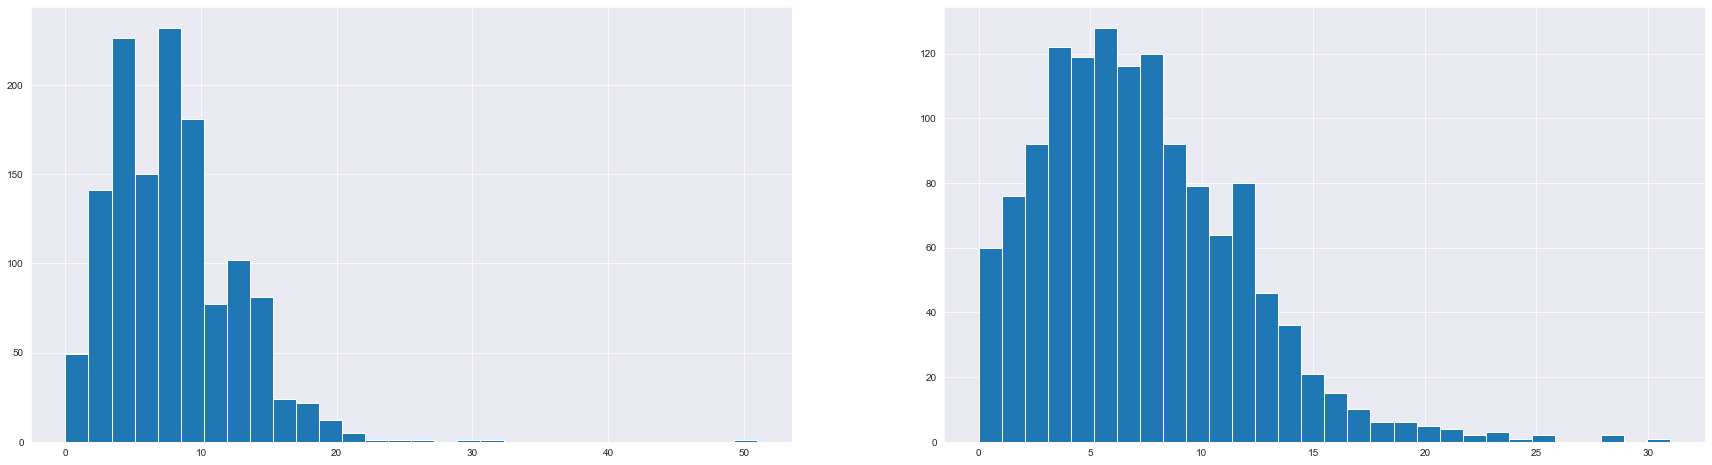

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
data_limited.blue_kills.hist(bins=30)
plt.subplot(1, 2, 2)
data_limited.red_kills.hist(bins=30)


<AxesSubplot:xlabel='red_kills'>

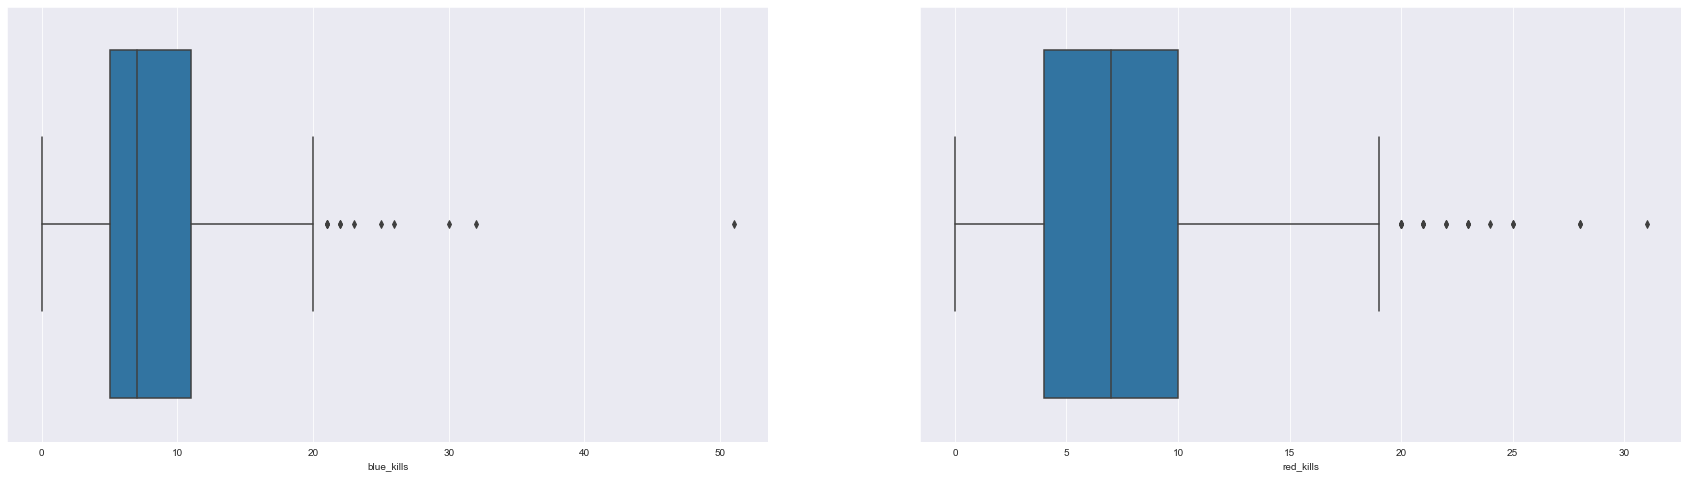

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_limited['blue_kills'])
plt.subplot(1, 2, 2)
sns.boxplot(x=data_limited['red_kills'])


Hàm xử lí ngoại lệ cho phân bố lệch trái

In [13]:
def skewed_outliers(df: DataFrame, column: str):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_bridge = df[column].quantile(0.75) + (IQR * 1.5)
    df.loc[df[column] >= int(upper_bridge), column] = int(upper_bridge)
    return df


Xử lí ngoại lệ các cột blue_kills, red_kills, blue_towers, red_towers

In [14]:
data_limited = skewed_outliers(data_limited, "blue_kills")
data_limited = skewed_outliers(data_limited, "red_kills")
data_limited = skewed_outliers(data_limited, "blue_towers")
data_limited = skewed_outliers(data_limited, "red_towers")

## Kiểm tra đa cộng tuyến


- Đa cộng tuyến là hiện tượng các biến độc lập có mối quan hệ tuyến tính với nhau. Hiện tượng đa cộng tuyến vi phạm giả định của mô hình hồi quy tuyến tính cổ điển là các biến độc lập không có mối quan hệ tuyến tính với nhau. 
- Có hai cách phát hiện đa cộng tuyến là dựa vào hệ số phóng đại phương sai VIF, hoặc dựa vào ma trận hệ số tương quan. Tuy nhiên cách dùng ma trận hệ số tương quan ít được sử dụng, chủ yếu sửa dụng cách nhận xét chỉ số VIF. (Ở đây sử dụng VIF)
    - VIF < 5: Không có hiện tượng đa cộng tuyến.
    - 5 < VIF < 10: Có hiện tượng đa cộng tuyến.

In [15]:
y, X = dmatrices('result ~ blue_end_gold+blue_kills+blue_towers+blue_inhibs+blue_dragons+blue_barons+blue_heralds+red_end_gold+red_kills+red_towers+red_inhibs+red_dragons+red_barons+red_heralds',
                 data=data_limited.drop(columns=['blue_tag', 'red_tag'], axis=1), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif


,VIF,variable
0,1760.982333,Intercept
1,7.194991,blue_end_gold
2,2.621788,blue_kills
3,4.856297,blue_towers
4,1.692344,blue_inhibs
5,2.867521,blue_dragons
6,1.942615,blue_barons
7,1.228769,blue_heralds
8,7.221777,red_end_gold
9,2.731710,red_kills


- Ta thấy blue_end_gold và red_end_gold đều có hiện tượng đa cộng tuyến (6.17 và 6.51) vì vậy cần loại bỏ trước khi train model.
- red_towers có VIF > 5 nhưng blue_towers < 5 nên không loại bỏ để giữ lại sự cân bằng cho data.

## Train Models


Chia data thành 2 tập train và test


In [16]:
X = data_limited.drop(columns=['blue_tag', 'red_tag', 'blue_end_gold', 'red_end_gold', 'result'], axis=1)
Y = data_limited['result']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)


Train model với các siêu tham số mặc định

In [17]:
model = LogisticRegression(solver='newton-cg', penalty='none', C=1e-2)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

Hàm hiển thị kết quả test

In [18]:
def display_result(predictions):
    cr = classification_report(Y_test, predictions)
    print('Classification Report : \n', cr)

    acc = round(model.score(X_test, Y_test) * 100, 2)
    print("Accuracy of Logistic Regression: " + str(acc) + "%")

    cm = confusion_matrix(Y_test,predictions)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=['red win', 'blue win'], yticklabels=['red win', 'blue win'])

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       223
           1       0.86      0.77      0.81       209

    accuracy                           0.83       432
   macro avg       0.83      0.82      0.83       432
weighted avg       0.83      0.83      0.83       432

Accuracy of Logistic Regression: 82.64%


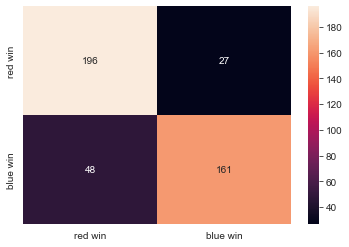

In [19]:
display_result(predictions)


Tìm bộ siêu tham số cho kết quả tốt nhất

In [20]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [1e-2, 1e-1, 1, 10]

grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid,
                           n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.828740 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


Train model với bộ siêu tham số tìm được

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       223
           1       0.86      0.77      0.81       209

    accuracy                           0.83       432
   macro avg       0.83      0.83      0.83       432
weighted avg       0.83      0.83      0.83       432

Accuracy of Logistic Regression: 82.87%


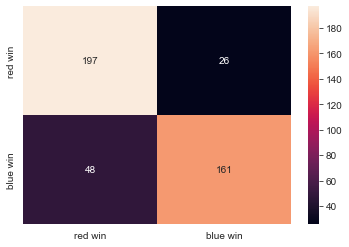

In [21]:
model = LogisticRegression(C=grid_result.best_params_['C'], solver=grid_result.best_params_['solver'], 
                            penalty=grid_result.best_params_['penalty'])
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

display_result(predictions)


Nhận xét: Sau khi sử dụng các siêu tham số thì độ chính xác dự đoán tăng hơn 0.2% (từ 82.64% lên 82.87%)

Dự đoán trong trường hợp cụ thể (trận có index = 10 trong tập dữ liệu test)

In [22]:
X_case = X_test.loc[[10]]
Y_case = Y_test.loc[[10]]

pred = model.predict_proba(X_case).reshape(-1, 1)

win = round(model.predict(X_case)[0], 2)
print("Blue team win") if win == 0 else print("Red team win")
fir_prob = round(pred[0][0] * 100, 2)
sec_prob = round(pred[1][0] * 100, 2)
print("Blue team win probability is: " + str(fir_prob) + "%")
print("Red team win probability is: " + str(sec_prob) + "%")

Blue team win
Blue team win probability is: 91.84%
Red team win probability is: 8.16%


Mô hình cho ra xác suất chiến thắng của đội xanh là 91.84% còn đội đỏ là 8.16%